Implantez une fonction recevant une liste de couples (xi,yi) ainsi qu'une liste d'abscisses αi et qui renvoie la liste des valeurs P(αi), P étant le polynôme d'interpolation construit sur les points (xi,yi)
.
Implantez cette même fonction par le biais de la méthode barycentrique et comparez les deux méthodes en termes de vitesses d'exécution avec des listes αi
conséquentes.
Implantez le calcul de P(α)
par l'algorithme de Neville-Atiken. Comparez sur quelques exemples la vitesse de convergence jusqu'à une certaine précision dans les cas suivants :

    Les (xi,yi)

sont intégrés au calcul dans un ordre aléatoire (éventuellement celui fourni par l'utilisateur)
Les (xi,yi)
sont intégrés au calcul dans l'ordre de la distance décroissante entre xi et α
.
Les (xi,yi)
sont intégrés au calcul dans l'ordre de la distance croissante entre xi et α.

In [110]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [87]:
def interple(points,absci):
    """
       Interpoler une une liste d'abscisse
    Args:
        points (list): liste des points pour l'interpolation
        absci (list): liste d'abscise a calculer par interpolation des points

    Returns:
        la valeur des P(aplha)
    """
    x=np.array([i[0] for i in points])
    y=np.array([i[1] for i in points])
    L_i=np.array([[np.prod([(p-j[0])/(i[0]-j[0]) for k,j in enumerate(points) if j[0]!=i[0]]) for k,i in enumerate(points)] for p in absci ])
    return (L_i*y).sum(axis=1)

In [88]:
interple([(-1,0),(0,0),(1,2)],[-0.5,2,3])

array([-0.25,  6.  , 12.  ])

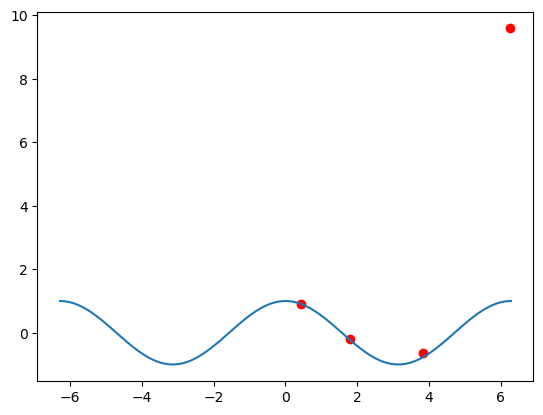

In [4]:
x=np.linspace(-2*np.pi,2*np.pi,100)
plt.Figure(figsize=(12,8))
plt.plot(x,np.cos(x))
x=np.random.rand(4)*2*np.pi
y=interple([(np.pi,-1),(0,1),(np.pi/4,np.sqrt(2)/2),(np.pi/3,0.5)],x)
plt.scatter(x,y,color='red')
plt.show()

In [108]:
ai=np.arange(1.5,100,0.1)

In [85]:
def barycentre(points,absci):
    """
       Calculer les P(aplha) d'une liste de points
    Args:
        points (list): liste des points pour interpoler
        absci (list): une liste d'abscise a calculer(les apha) 

    Returns:
        la valeur des P(aplha)
    """
    res=[]
    A_i=[np.prod([1/(i[0]-j[0]) for k,j in enumerate(points) if i[0]!=j[0]]) for r,i in enumerate(points) ]
    for p in absci:
         res.append(sum([j[1]*A_i[i]/(p-j[0]) for i,j in enumerate(points)])/sum([A_i[i]/(p-j[0]) for i,j in  enumerate(points)]))  
    return res

In [84]:
barycentre([(-1,0),(0,0),(1,2)],[-0.5,2,3])

[-0.25, 6.000000000000002, 11.999999999999995]

In [8]:
%%timeit
ai=np.arange(1.5,10000,0.1)

163 µs ± 12.7 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [9]:
import time
start_time = time.time()
## ligne de code pour réaliser la rotation avec l'interpolation choisie
interple([(-1,0),(0,0),(1,2)],ai)
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.0846257209777832 seconds ---


In [10]:
import time
start_time = time.time()
## ligne de code pour réaliser la rotation avec l'interpolation choisie
s2=barycentre([(-1,0),(0,0),(1,2)],ai)
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.03124690055847168 seconds ---


# La methode barycentrique est plus rapide que l'interpolation

In [106]:
def methode_Aiken(points,abcisses,tolerance):
        """
        Calculer les P(aplha) d'une liste de aplha avec la methode Aiken
        Args:
            points (list): liste des points pour interpoler
            absci (list): une liste de apha 
            tolerance (float): precision

        Returns:
            la valeur des P(alpha)
        """
        n = len(points)
        memory = np.zeros((n, n))
        values=[]
        for alpha in abcisses: 
            for i in range(n):
                memory[i, 0] = couples[i][1]

            iterations = 0
            for j in range(1, n):
                for i in range(n - j):
                    xi, xj = couples[i][0], couples[i + j][0]
                    memory[i, j] = ((alpha - xj) * memory[i, j - 1] - (alpha - xi) * memory[i + 1, j - 1]) / (xi - xj)
                    iterations += 1     
                    if j > 1 and np.all(np.abs(memory[i, j] - memory[i, j-1]) < tolerance):
                        values.append(memory[i, j])
            values.append(memory[i, j])
    
        return values

In [112]:
# Calcul des polynômes
couples = [(1, 2), (2, 3), (3, 5)]  
result = methode_Aiken(couples, [5,6,7],0.03)
result

[12.0, 17.0, 23.0]

In [109]:
s2=barycentre(couples,[5,6,7])
s2

[11.999999999999995, 17.000000000000004, 23.000000000000043]

In [114]:
%%timeit
s2=methode_Aiken([(-1,0),(0,0),(1,2)],ai,0.02)

42.8 ms ± 2.24 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [115]:
%%timeit
s2=barycentre([(-1,0),(0,0),(1,2)],ai)

10.3 ms ± 903 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


# Mon implementation Barycentre est plus rapide que mon implementation Aiken